# Asteroid dynamical families

Figure 3.8 from Chapter 3 of Ryden, *Celestial and Stellar Dynamics*, Cambridge University Press.

Proper orbital elements (inclination versus semimajor axis) for ~50,000 asteroids in the main belt with diameters absolute magnitudes bright than H=14.5, which corresponds to a size of ~5 km for a typical 
range of geometric albedos for main-belt asteroids. The asteroid families discussed in the text are labeled.

In [1]:
%matplotlib inline

import math
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, LogLocator, NullFormatter

import warnings
warnings.filterwarnings('ignore',category=UserWarning, append=True)
warnings.filterwarnings('ignore',category=RuntimeWarning, append=True)

## Standard Plot Format

Setup the standard plotting format and make the plot.  

In [2]:
plotFile = 'Fig3_8.png' 

# graphic aspect ratio = width/height

aspect = 4.0/3.0 # 4:3

#
# Don't change these unless you really need to (we never have)
#
# fPage is the horizontal fraction of the page occupied by the figure, default 1.0
#
# scaleFac is the LaTeX includegraphics scaling in units of \textwidth, default 1.0
#

fPage = 1.0
scaleFac = 0.85

# Text width in inches - don't change, this is defined by the print layout

textWidth = 6.0 # inches

figFmt = 'png'
dpi = 600
plotWidth = dpi*fPage*textWidth
plotHeight = plotWidth/aspect
axisFontSize = 12
labelFontSize = 10
lwidth = 0.5
axisPad = 5
wInches = fPage*textWidth # float(plotWidth)/float(dpi)
hInches = wInches/aspect  # float(plotHeight)/float(dpi)

# LaTeX is used throughout for markup of symbols, Times-Roman serif font

plt.rc('text', usetex=True)
plt.rc('font', **{'family':'serif','serif':['Times-Roman'],'weight':'bold','size':'16'})

# Font and line weight defaults for axes

matplotlib.rc('axes',linewidth=lwidth)
matplotlib.rcParams.update({'font.size':axisFontSize})

# axis and label padding

plt.rcParams['xtick.major.pad']=f'{axisPad}'
plt.rcParams['ytick.major.pad']=f'{axisPad}'
plt.rcParams['axes.labelpad'] = f'{axisPad}'

## Asteroid proper orbit elements

Read ASCII data files of proper orbit elements of Main Belt and Hungaria asteroids from the AstDyS-2 database: 
https://newton.spacedys.com/astdys/, file `all.syn`, which we rename `AstDyS-2_all.txt` to 
distinguish it from other files in the `Asteroids/` folder.

We make a brightness cut of all asteroids brighter than H=14.5, which corresponds to a size of roughly 3-5km
for typical values of asteroid geometric albedo (see https://cneos.jpl.nasa.gov/tools/ast_size_est.html at the
JPL Center for Near Earth Studies for a useful table).

In [3]:
dataFile = 'Asteroids/AstDyS-2_all.txt'

data = pd.read_csv(dataFile,sep=r'\s+',header=None,comment='%',low_memory=False)

H = np.array(data[1])
minH = 14.0

iBright = np.where(H <= minH)[0]
print(f'{len(iBright)} asteroids brighter than H={minH:.1f}mag')
a_p = np.array(data[2])[iBright]
e_p = np.array(data[3])[iBright]
i_p = np.degrees(np.arcsin(data[4]))[iBright]

apMin = 2.1 # au
apMax = 3.3 # au
ipMin = 0.0  # deg
ipMax = 18.0 # deg
epMin = 0.0
epMax = 0.30

# outline text to highlight against dark background?

outline = False
famFont = 14

31704 asteroids brighter than H=14.0mag


## Figure 3.8

Label the asteroid families named in the text:
 * Vesta family: a=2.4au, i=7, e=0.1
 * Eunomia family: a=2.6au, i=13, e=0.15
 * Themis family: a=3.1au, i=1.5, e=0.15

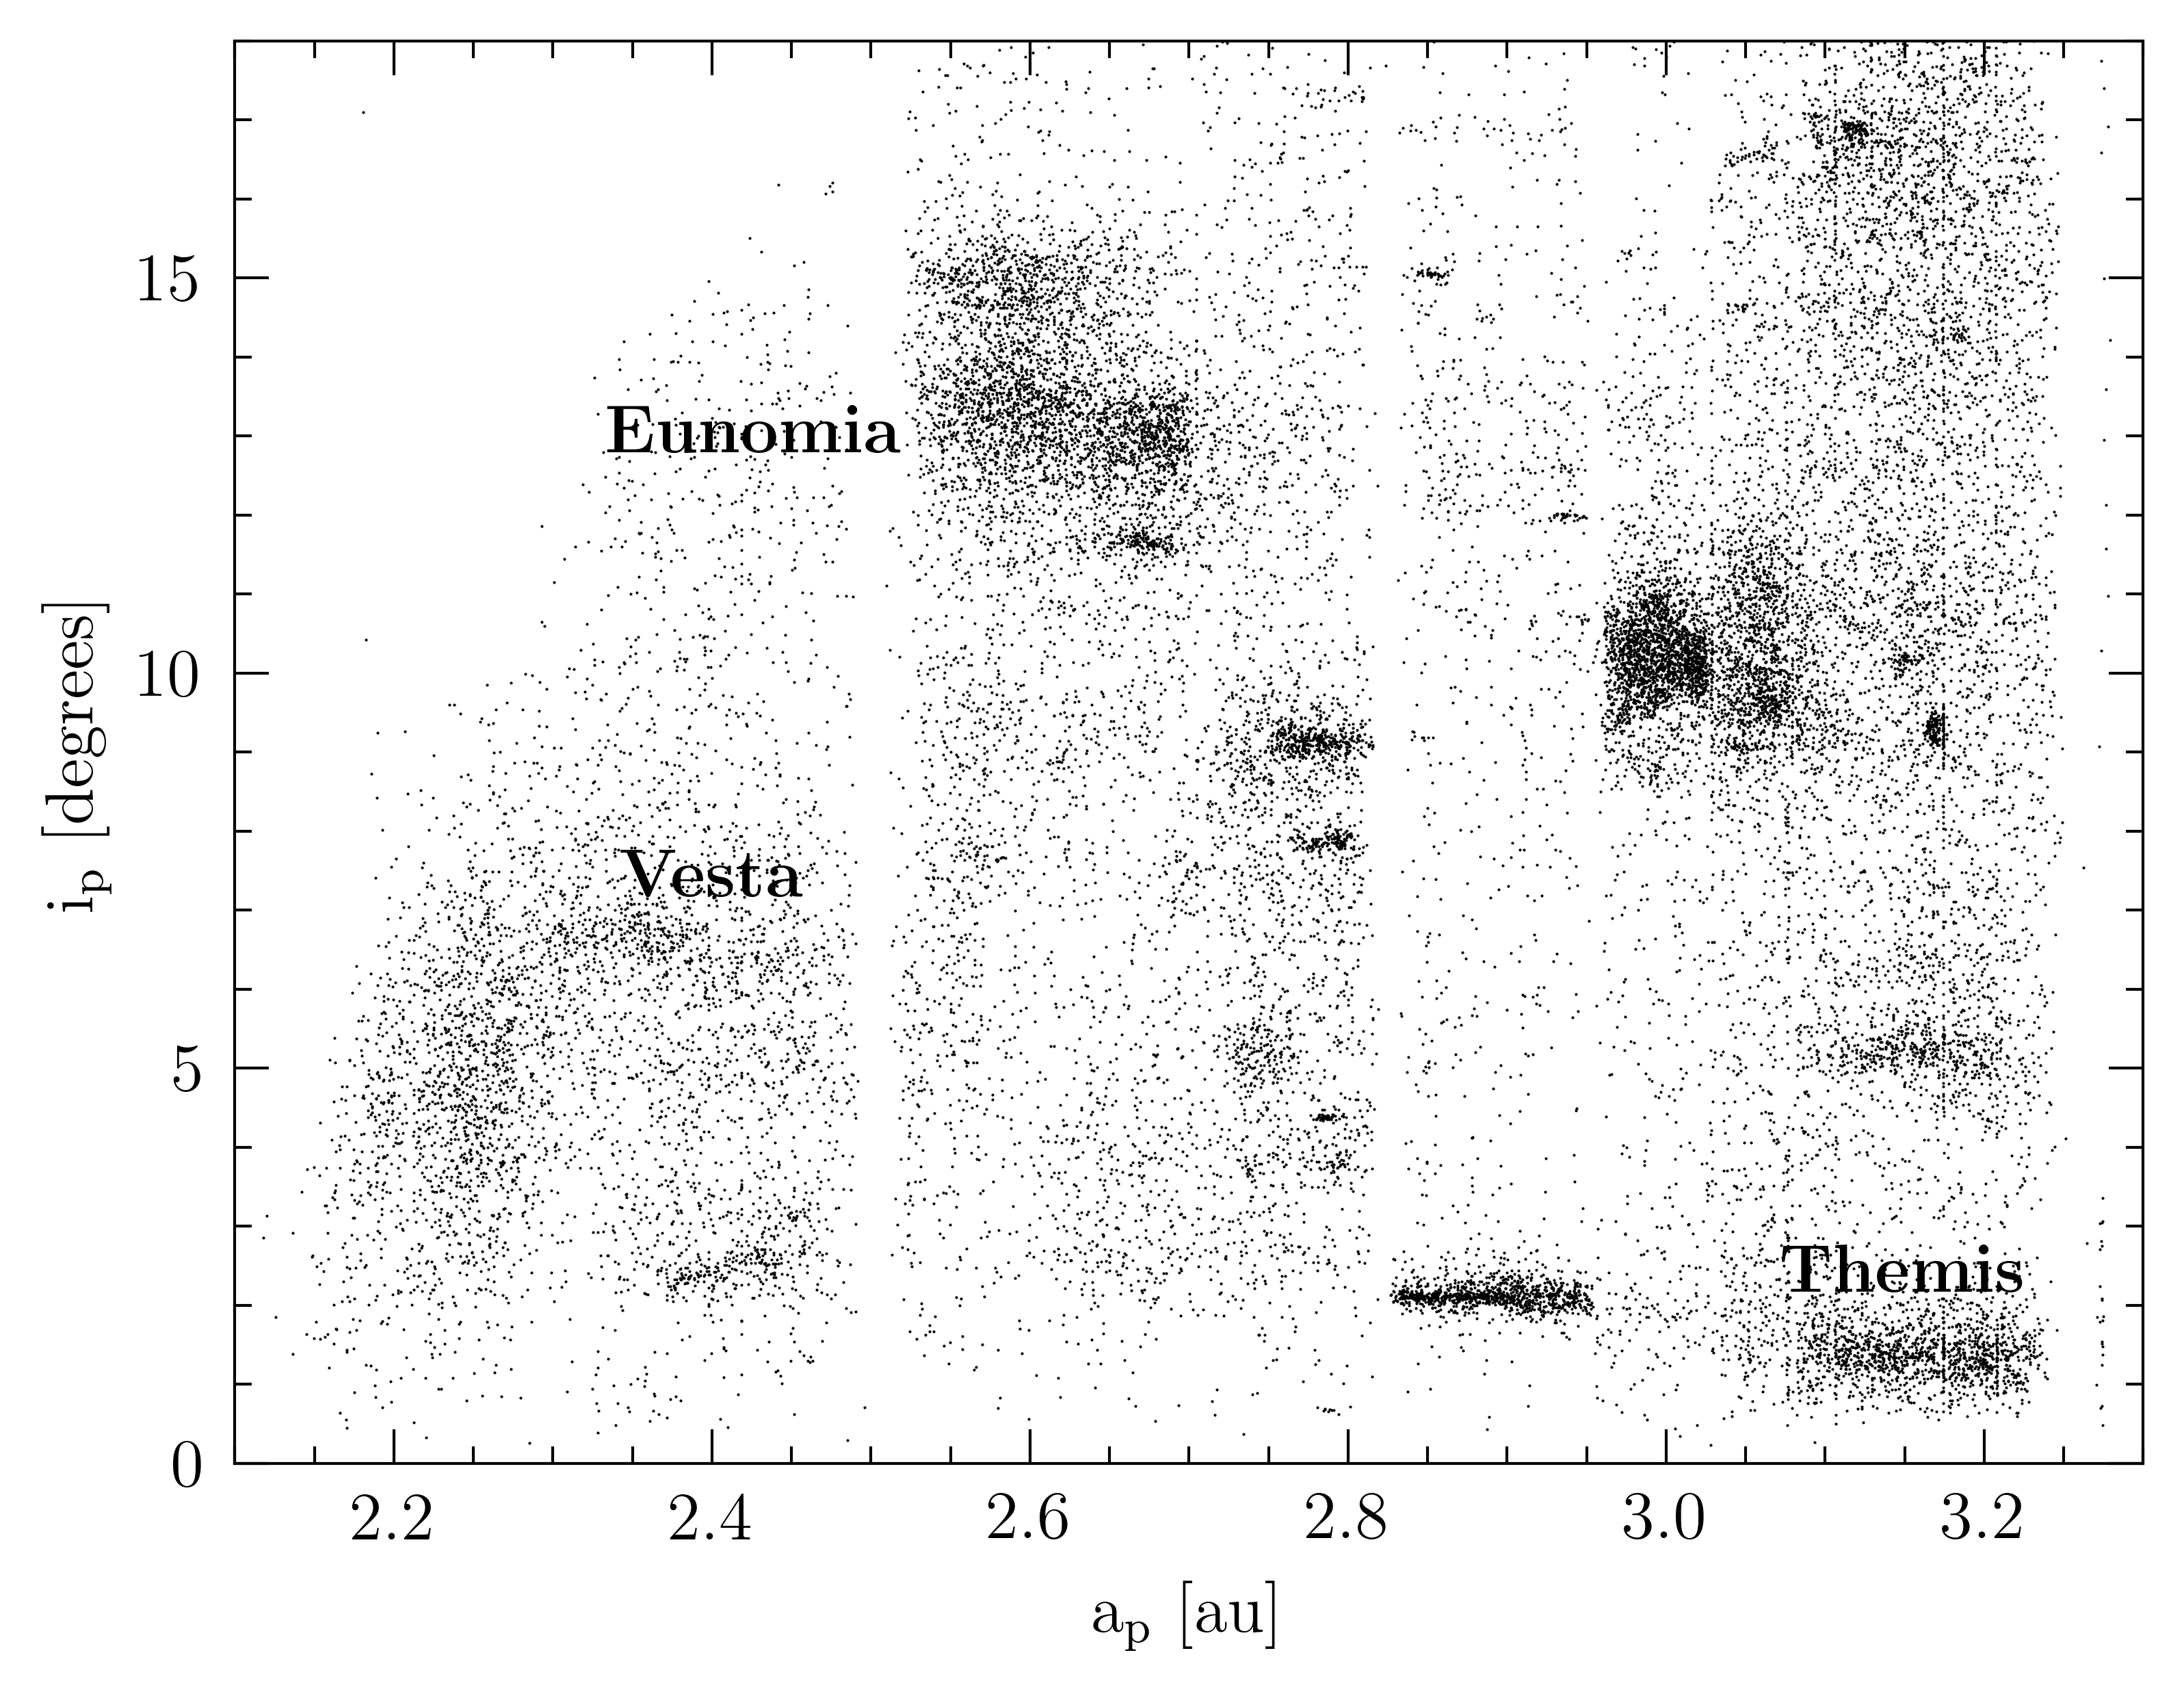

In [4]:
fig,ax = plt.subplots(figsize=(wInches,hInches),dpi=dpi)

ax.tick_params('both',length=6,width=lwidth,which='major',direction='in',top='on',right='on')
ax.tick_params('both',length=3,width=lwidth,which='minor',direction='in',top='on',right='on')

# Limits

ax.set_xlim(apMin,apMax)
ax.xaxis.set_major_locator(MultipleLocator(0.2))
ax.xaxis.set_minor_locator(MultipleLocator(0.05))
ax.set_xlabel(r'a$_{\rm p}$ [au]',fontsize=axisFontSize)

ax.set_ylim(ipMin,ipMax)
ax.yaxis.set_major_locator(MultipleLocator(5))
ax.yaxis.set_minor_locator(MultipleLocator(1))
ax.set_ylabel(r'i$_{\rm p}$ [degrees]',fontsize=axisFontSize)

ax.plot(a_p,i_p,'o',ms=0.5,mfc='black',mec=None,mew=0,alpha=1,zorder=8)

# asteroid families of interest

import matplotlib.patheffects as pe

if outline:
    txt = ax.text(2.4,7.0,'Vesta',va='center',ha='center',size=axisFontSize,color='white',
                  path_effects=[pe.withStroke(linewidth=1.2,foreground="black")],zorder=10)

    txt = ax.text(2.6,13.0,'Eunomia',va='center',ha='center',size=axisFontSize,color='white',
                  path_effects=[pe.withStroke(linewidth=1.2,foreground="black")],zorder=10)

    txt = ax.text(3.1,1.5,'Themis',va='center',ha='center',size=axisFontSize,color='white',
                  path_effects=[pe.withStroke(linewidth=1.2,foreground="black")],zorder=10)
else:
    ax.text(2.4,7.0,r'{\bf Vesta}',va='bottom',ha='center',fontsize=axisFontSize)
    ax.text(2.52,13,r'{\bf Eunomia}',va='center',ha='right',fontsize=axisFontSize)
    ax.text(3.15,2.,r'{\bf Themis}',va='bottom',ha='center',fontsize=axisFontSize)

plt.plot()
plt.savefig(plotFile,bbox_inches='tight',facecolor='white')